In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import os.path

In [16]:
pwm_sources = ["oRNAment", "K562", "HepG2"]

to_do = {"HNRNPA1" : "rep1", 
         "HNRNPK" : "both", 
         "RBFOX2" : "rep2"}
dats=[]
for rbp,rep in to_do.items(): 
    for pwm_source in pwm_sources:
        fn = "predict_enrich_notebooks/metrics_%s_%s.tsv" % (rbp, pwm_source)
        if os.path.isfile(fn):
            dat = pd.read_csv(fn, sep = "\t")
            dat["RBP"] = rbp
            dat["pwm_source"] = pwm_source
            dats.append(dat)
dat = pd.concat(dats)
dat

,loss,acc,auroc,aupr,RBP,pwm_source
0,4.354678,0.333996,0.757308,0.032788,HNRNPA1,oRNAment
0,4.244437,0.459054,0.816300,0.036582,HNRNPA1,K562
0,4.258952,0.443548,0.801054,0.032218,HNRNPA1,HepG2
0,5.483628,0.444841,0.845067,0.295968,HNRNPK,oRNAment
0,5.445842,0.450695,0.834625,0.262449,HNRNPK,K562
0,5.456815,0.446025,0.834897,0.264025,HNRNPK,HepG2
0,51.271137,0.102748,0.677044,0.071017,RBFOX2,oRNAment
0,51.271137,0.080857,0.633050,0.046811,RBFOX2,K562
0,51.271137,0.106260,0.676346,0.054172,RBFOX2,HepG2


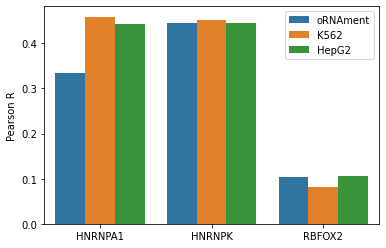

In [21]:
sns.barplot(x = "RBP", y = "acc", hue = "pwm_source", data = dat)
plt.ylabel("Pearson R")
plt.xlabel(None)
plt.legend()